# $\rho'$ analysis notes

## Data Acqusition

### Run numbers

### Lego Train

### Data scheme

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as ps
import awkward

class UPCFiles:
    ccup8_2015 =  r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/pvn/ccup8.sel.new.root"
    ccup9_2015 =  r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/pvn/ccup9.sel.new.root"
    ccup29_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup29.sel.new.root"
    ccup30_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup30.sel.new.root"
    ccup31_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup31.sel.new.root"
    
    ccup8_2015_win  =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\pvn\ccup8.sel.new.root"
    ccup9_2015_win  =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\pvn\ccup9.sel.new.root"
    ccup29_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup29.sel.new.root"
    ccup30_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup30.sel.new.root"
    ccup31_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup31.sel.new.root"
    
    ccup9_2015_my = r"D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root"

events = uproot.open(UPCFiles.ccup9_2015_win)['events']
entries = events.numentries
events.show()
events.name, events.title, events.numentries

dV0                        (no streamer)              asdtype("('>f4', (6,))")
EnZDC                      (no streamer)              asdtype("('>f4', (6,))")
dAD                        (no streamer)              asdtype("('>f4', (6,))")
vertex                     (no streamer)              asdtype("('>f4', (3,))")
nTracks                    (no streamer)              asdtype('>i4')
nTracklets                 (no streamer)              asdtype('>i4')
eventinfo                  (no streamer)              asdtype("('>i4', (4,))")
TDCa                       (no streamer)              asdtype("('>f4', (4,))")
TDCc                       (no streamer)              asdtype("('>f4', (4,))")
TriggerType                (no streamer)              asdtype("('>i4', (2,))")
dca0                       (no streamer)              asdtype("('>f4', (177,))")
dca1                       (no streamer)              asdtype("('>f4', (177,))")
ITSNcls                    (no streamer)              asdtype("('>i4

(b'events', b'events', 1135259)

## Four prongs selection


In [114]:
start = 0
stop  = 300000
itsl0 = events.array("HasPointOnITSLayer0", entrystart=start, entrystop=stop)
itsl1 = events.array("HasPointOnITSLayer1", entrystart=start, entrystop=stop)
tpcref = events.array("StatusAndTPCRefit", entrystart=start, entrystop=stop)
itcref = events.array("StatusAndITSRefit", entrystart=start, entrystop=stop)
dca0 = events.array("dca0", entrystart=start, entrystop=stop)
dca1 = events.array("dca1", entrystart=start, entrystop=stop)
tpcncls = events.array("TPCNcls", entrystart=start, entrystop=stop)
sigmtpcpion = events.array("NumberOfSigmasTPCPion", entrystart=start, entrystop=stop)
pt = events.array("Pt", entrystart=start, entrystop=stop)
px = events.array("Px", entrystart=start, entrystop=stop)
py = events.array("Py", entrystart=start, entrystop=stop)
pz = events.array("Pz", entrystart=start, entrystop=stop)
q = events.array("charge", entrystart=start, entrystop=stop)
entries = len(q)
# TODO: why tpcref freq value is 64?
select = ((itsl0 == 1) + (itsl1 == 1)) * (tpcref > 0) * (itcref > 0) * ((np.abs(dca0) < 3) + (np.abs(dca1) < 3)) * (tpcncls > 50) * (np.abs(sigmtpcpion) < 3)

GoodEvents = np.argwhere(np.sum(select,axis=1)==4)
GoodTracks = np.argwhere(select[GoodEvents.flatten()]==True).reshape(len(GoodEvents),8)
GoodEventsAndTracks = np.append(GoodEvents,GoodTracks[:,1:len(GoodTracks):2], axis=1) # array([[ 389,    2,    3,    5,    7],...])
GoodEventsNumber = GoodEventsAndTracks[:,0]
GoodTracksNum = GoodEventsAndTracks[:,1:]
print(f'Numer of events with 4pr: {len(GoodEventsNumber)}')

Numer of events with 4pr: 4220


Transversal momentum distribution for ccup9 trigger:

<ipython-input-115-d64eafff2e64>:13: RuntimeWarning: divide by zero encountered in floor_divide
  ax.errorbar(bins[:-1],counts, 10 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')


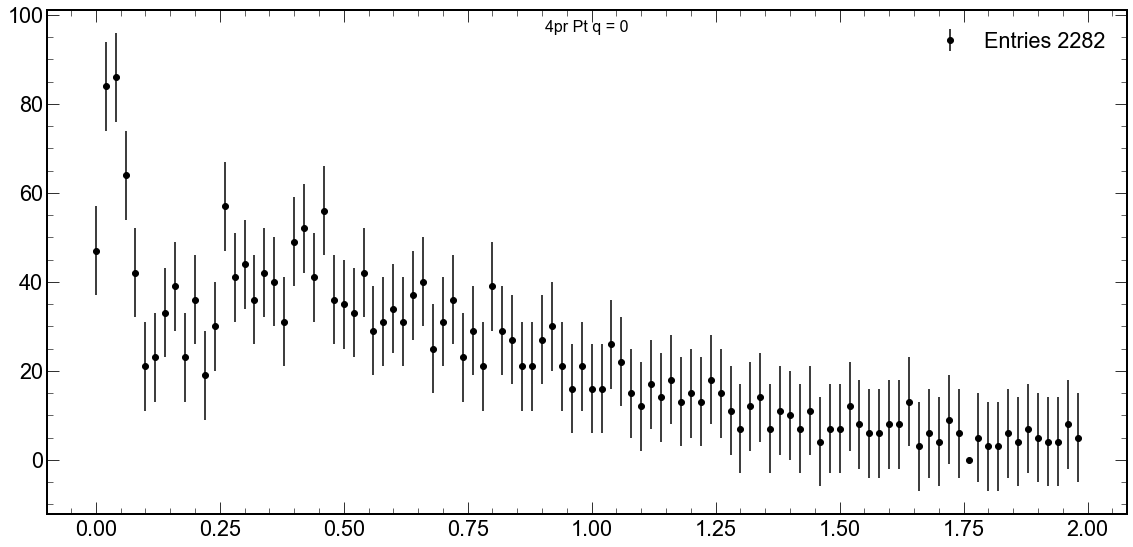

In [115]:
pxg = px[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
pyg = py[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
pzg = pz[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)

goodCharges = q[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
goodChargesEventNumbers = np.argwhere(np.sum(goodCharges,axis=1)==0)
ptMy = np.sqrt(np.sum(np.add(np.sum(pxg[goodChargesEventNumbers], axis=2)**2, np.sum(pyg[goodChargesEventNumbers], axis=2)**2),axis=1))
counts, bins = np.histogram(ptMy,bins=100, range=(0,2))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Pt q = 0', fontsize=16)
plt.style.use(hep.style.ROOT)
ax.errorbar(bins[:-1],counts, 10 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')

ax.legend()


## Mass

<ipython-input-116-40b2d914db2e>:24: RuntimeWarning: divide by zero encountered in floor_divide
  ax.errorbar(bins[:-1],counts, 30 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')


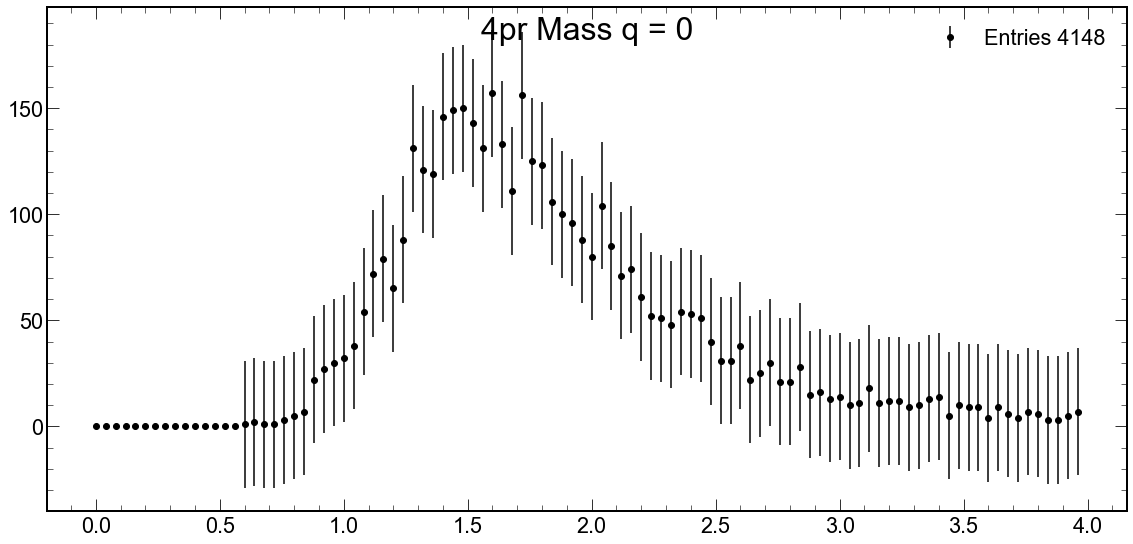

In [116]:
massPion = np.full(pxg.shape[0], 0.140)

# float esum = sqrt( (trk[0]->Px())*trk[0]->Px() + (trk[0]->Py())*trk[0]->Py() +(trk[0]->Pz())*trk[0]->Pz() + partmass*partmass);
# esum = esum + sqrt( (trk[1]->Px())*trk[1]->Px() + (trk[1]->Py())*trk[1]->Py() +(trk[1]->Pz())*trk[1]->Pz() + partmass*partmass);
# float amass = sqrt( esum*esum - pxsum*pxsum - pysum*pysum - pzsum*pzsum );


Energy0 = np.sqrt(massPion**2 + pxg[:,0]**2 + pyg[:,0]**2 + pzg[:,0]**2)
Energy1 = np.sqrt(massPion**2 + pxg[:,1]**2 + pyg[:,1]**2 + pzg[:,1]**2)
Energy2 = np.sqrt(massPion**2 + pxg[:,2]**2 + pyg[:,2]**2 + pzg[:,2]**2)
Energy3 = np.sqrt(massPion**2 + pxg[:,3]**2 + pyg[:,3]**2 + pzg[:,3]**2)

Energy = Energy0 + Energy1 + Energy2 + Energy3

Mass = np.sqrt(Energy**2 - np.sum(pxg,axis=1)**2 - np.sum(pyg,axis=1)**2 - np.sum(pzg,axis=1)**2)



counts, bins = np.histogram(Mass,bins=100, range=(0,4))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Mass q = 0', fontsize=32)
plt.style.use(hep.style.ROOT)
ax.errorbar(bins[:-1],counts, 30 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')

ax.legend()


## DRAFTS

float32
(1135258, 6)


(array([2.18910e+05, 2.94824e+05, 2.48520e+05, 1.65558e+05, 9.72170e+04,
        5.20170e+04, 2.60990e+04, 1.25340e+04, 6.23400e+03, 3.04300e+03,
        1.69100e+03, 9.84000e+02, 6.94000e+02, 4.28000e+02, 3.49000e+02,
        3.50000e+02, 2.49000e+02, 2.14000e+02, 2.44000e+02, 2.31000e+02,
        1.85000e+02, 1.84000e+02, 2.04000e+02, 2.05000e+02, 1.81000e+02,
        1.41000e+02, 1.86000e+02, 1.93000e+02, 1.82000e+02, 2.02000e+02,
        2.51000e+02, 2.75400e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32.], dtype=float32),
 <a list of 1 Patch objects>)

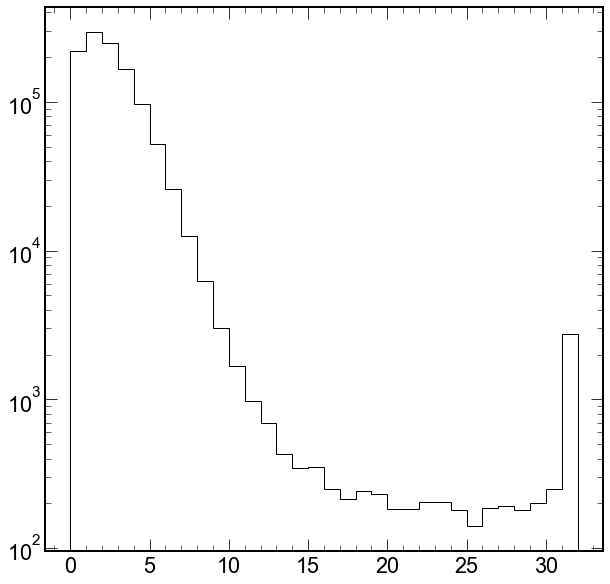

In [155]:
#  if( fAODVZero ) {
#     for(Int_t iv0=0; iv0<64; iv0++) {
#       if( fAODVZero->GetBBFlag(iv0) == 1 && iv0 < 32 ) nbbc++;
#       if( fAODVZero->GetBBFlag(iv0) == 1 && iv0 > 31 ) nbba++;
#       if( fAODVZero->GetBBFlag(iv0) != 1 && fAODVZero->GetBBFlag(iv0) != 0 ) std::cout<<"ogogo"<<std::endl;
#     }

#     dV0[0]=nbba;
#     dV0[1]=nbbc;
#     dV0[2]=fAODVZero->GetV0ADecision();
#     dV0[3]=fAODVZero->GetV0CDecision();
#     dV0[4]=fAODVZero->GetNbPMV0A();
#     dV0[5]=fAODVZero->GetNbPMV0C();

start = 0
stop  = -1
dv0 = events.array("dV0", entrystart=start, entrystop=stop)
print(dv0.dtype)
print(dv0.shape)

n = 5
counts, bins = np.histogram(dv0[:,n],bins=32, range=(0,32))
plt.style.use(hep.style.ROOT)
plt.hist(dv0[:,n], bins=bins, log=True, histtype='step', color='black')

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as ps
import awkward

ccup9_2015_my = r"D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root"

events = uproot.open(ccup9_2015_my)['RhoPrimeCentral/events']
entries = events.numentries
events.show()
print(events.name, events.title, events.numentries)

# mycache = uproot.ArrayCache(1024*1024 * 10)
data = events.arrays('*', namedecode="utf-8")
data['nTracks'].sum() # 2 652 742 wo limitation # 208 039 with 177 tracks limitation

RunNum                     (no streamer)              asdtype('>i4')
PeriodNumber               (no streamer)              asdtype('>u4')
OrbitNumber                (no streamer)              asdtype('>u4')
BunchCrossNumber           (no streamer)              asdtype('>u2')
Mass                       (no streamer)              asdtype('>f4')
Pt                         (no streamer)              asdtype('>f4')
Q                          (no streamer)              asdtype('>i2')
Rapidity                   (no streamer)              asdtype('>f4')
Phi                        (no streamer)              asdtype('>f4')
ZNAenergy                  (no streamer)              asdtype('>f4')
ZNCenergy                  (no streamer)              asdtype('>f4')
ZPAenergy                  (no streamer)              asdtype('>f4')
ZPCenergy                  (no streamer)              asdtype('>f4')
VtxX                       (no streamer)              asdtype('>f4')
VtxY                       (no str

2652742

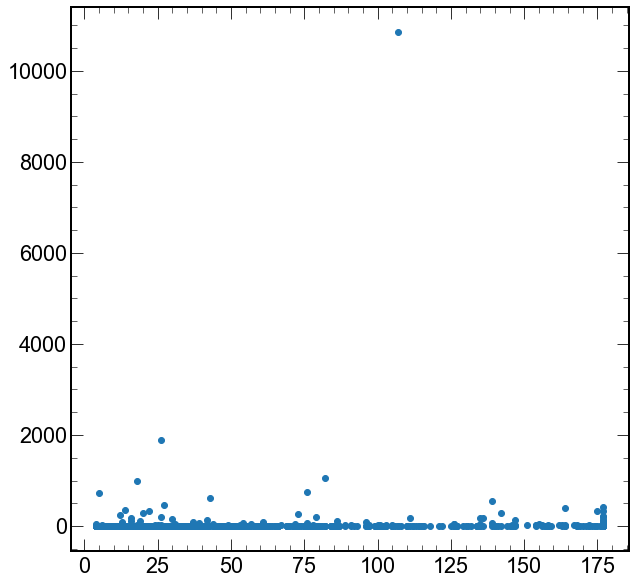

In [18]:
pt = np.sqrt(data['TrackPx'].sum()**2  + data['TrackPy'].sum()**2)

plt.scatter(data['nTracks'], pt)

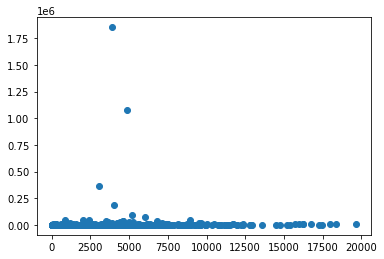

In [2]:
pt = np.sqrt(data['TrackPx'].sum()**2  + data['TrackPy'].sum()**2)

plt.scatter(data['nTracks'], pt)

(array([12., 12., 17., 23., 13., 32., 16., 26., 28., 26., 30., 33., 27.,
        36., 38., 27., 37., 40., 27., 36., 45., 31., 49., 24., 26., 30.,
        27., 32., 32., 24., 16., 37., 26., 35., 32., 22., 20., 28., 23.,
        24., 21., 26., 18., 16., 24., 14., 26., 26., 14., 18., 22., 12.,
        19., 12., 14., 10., 14., 10., 19., 13., 10., 17., 18., 11., 15.,
        14., 12., 14., 18., 11., 12., 17., 12., 15.,  5.,  9.,  1.,  5.,
         8., 11., 15.,  9.,  6.,  7.,  9.,  8.,  6., 10.,  8., 11.,  4.,
         6.,  8.,  5.,  7.,  6.,  6.,  5.,  8.,  8.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
        2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.

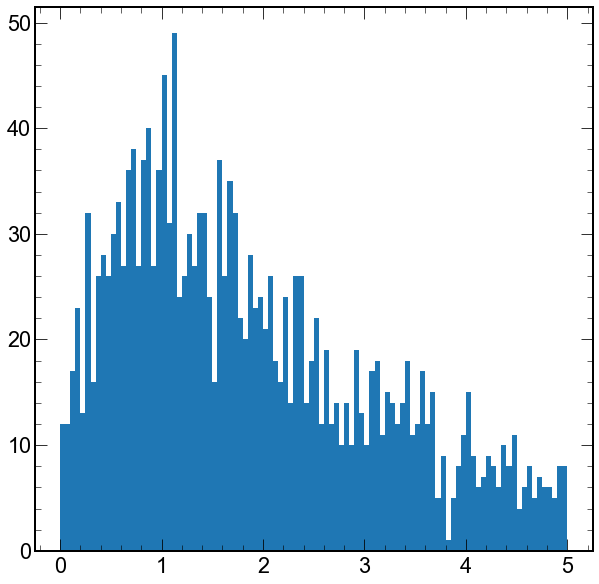

In [19]:
pt = np.sqrt(data['TrackPx'].sum()**2  + data['TrackPy'].sum()**2)
counts, bins = np.histogram(pt, bins=100, range=(0,5))
plt.hist(pt,bins=bins)

(array([12., 12., 15., 23., 12., 32., 16., 26., 26., 26., 26., 33., 27.,
        34., 38., 27., 36., 40., 26., 34., 44., 31., 46., 24., 25., 29.,
        26., 29., 32., 23., 16., 34., 25., 34., 30., 18., 19., 25., 21.,
        21., 18., 25., 14., 15., 22., 13., 22., 24., 12., 16., 19.,  9.,
        15., 11., 13., 10., 12.,  9., 17., 14.,  8., 15., 15.,  9., 11.,
        12., 13., 13., 16., 10., 11., 16.,  9., 10.,  5.,  5.,  1.,  4.,
         7.,  8., 10.,  9.,  2.,  3.,  6.,  6.,  7.,  5.,  5.,  9.,  1.,
         6.,  6.,  2.,  3.,  4.,  4.,  2.,  2.,  5.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
        2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.

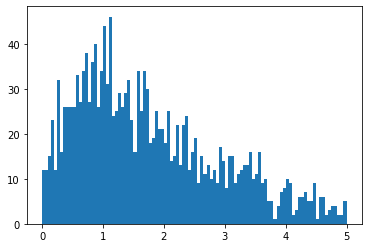

In [5]:
pt = np.sqrt(data['TrackPx'].sum()**2  + data['TrackPy'].sum()**2)
counts, bins = np.histogram(pt, bins=100, range=(0,5))
plt.hist(pt,bins=bins)

In [46]:
# get events with tracks more than 200
eventsWithTracksMoreThan200 = np.argwhere(data['nTracks'] > 200)
GoodEvents = np.argwhere(data['TrackHasPointOnITSLayer0'][eventsWithTracksMoreThan200].sum().flatten()==4).flatten()
GoodEvents = eventsWithTracksMoreThan200[GoodEvents]

0


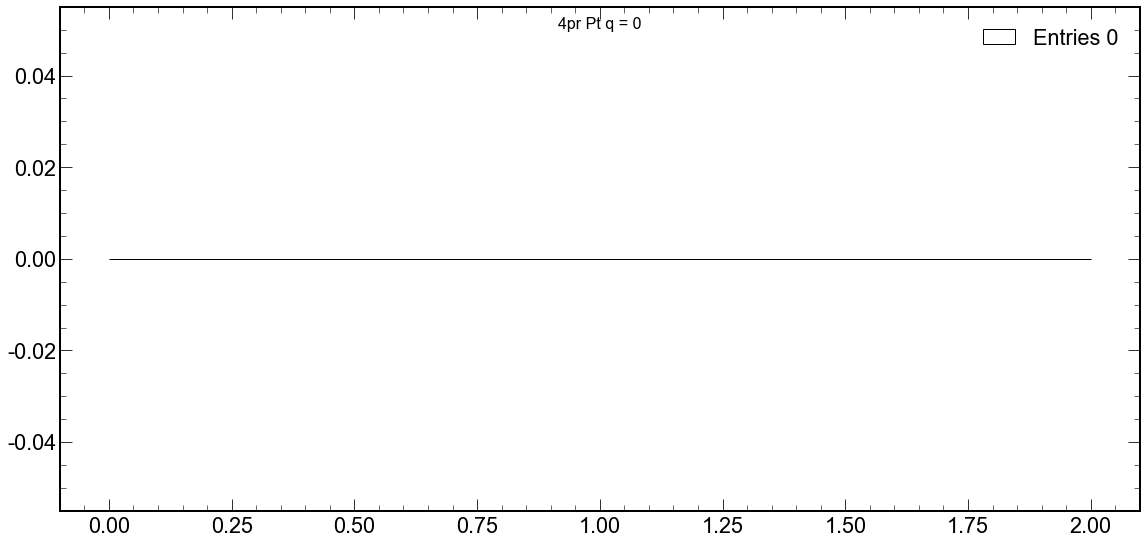

In [47]:
# (tpcref > 0) * (itcref > 0) * ((np.abs(dca0) < 3) + (np.abs(dca1) < 3)) * (tpcncls > 50) * (np.abs(sigmtpcpion) < 3)
# select = ((data['TrackHasPointOnITSLayer0'] == 1) + (data['TrackHasPointOnITSLayer1'] == 1))
# get only events with 4 tracks
# GoodEvents = np.argwhere(select.sum()==4)
# get events that have total zero charge from 4 tracks 
GoodEvents = GoodEvents[np.argwhere(data['TrackQ'][GoodEvents.flatten()].sum()==0).flatten()].flatten()

pxg = data['TrackPx'][GoodEvents][select[GoodEvents]]
pyg = data['TrackPy'][GoodEvents][select[GoodEvents]]
pzg = data['TrackPz'][GoodEvents][select[GoodEvents]]

pt = np.sqrt(pxg.sum()**2  + pyg.sum()**2)
counts, bins = np.histogram(pt,bins=100, range=(0,2))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Pt q = 0', fontsize=16)
plt.style.use(hep.style.ROOT)
ax.hist(pt, bins=bins, histtype='step', color='black', label=f'Entries {np.sum(counts)}')
ax.legend()
print (counts.sum())

# 51 fitted events without limitations on tracks 

array([ 1.38558008,  0.92177155,  3.05370221,  1.44602019,  1.2522976 ,
        1.47632954,  1.3618712 ,  1.9450852 ,  1.4598382 ,  1.65330027,
        1.61947448,  1.27024099,  1.24617152,  3.38263981,  4.01836567,
        1.45161882,  1.55098474,  2.38267731,  1.79799537,  0.99936679,
        0.68718275,  1.72474635,  1.34248542,  0.70643842,  1.53108821,
        1.36236295,  0.98468008,  1.00873571, 13.51634345,  0.66102105,
        1.72721725,  1.44844782,  1.65707352,  1.78232355,  1.61059275,
        1.73503756,  1.83046465,  1.48517929,  0.72170119,  1.56181451,
        1.00650293,  1.54693414,  1.45614304,  0.96331216,  1.36872321,
        2.35214192,  1.70210496,  0.8768413 ,  1.51631425,  1.71641727,
        5.98360825,  1.62483431,  1.73372369])

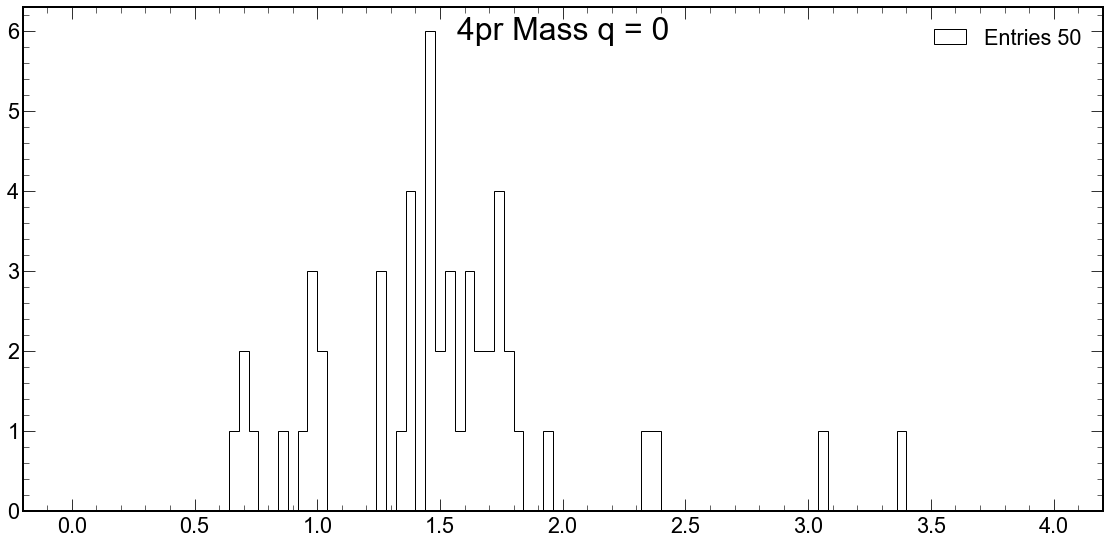

In [4]:
massPion = np.full(pxg.shape[0], 0.140)

# float esum = sqrt( (trk[0]->Px())*trk[0]->Px() + (trk[0]->Py())*trk[0]->Py() +(trk[0]->Pz())*trk[0]->Pz() + partmass*partmass);
# esum = esum + sqrt( (trk[1]->Px())*trk[1]->Px() + (trk[1]->Py())*trk[1]->Py() +(trk[1]->Pz())*trk[1]->Pz() + partmass*partmass);
# float amass = sqrt( esum*esum - pxsum*pxsum - pysum*pysum - pzsum*pzsum );

Energy0 = np.sqrt(massPion**2 + pxg[:,0]**2 + pyg[:,0]**2 + pzg[:,0]**2)
Energy1 = np.sqrt(massPion**2 + pxg[:,1]**2 + pyg[:,1]**2 + pzg[:,1]**2)
Energy2 = np.sqrt(massPion**2 + pxg[:,2]**2 + pyg[:,2]**2 + pzg[:,2]**2)
Energy3 = np.sqrt(massPion**2 + pxg[:,3]**2 + pyg[:,3]**2 + pzg[:,3]**2)

Energy = Energy0 + Energy1 + Energy2 + Energy3


Mass = np.sqrt(Energy**2 - pxg.sum()**2 - pyg.sum()**2 - pzg.sum()**2)
counts, bins = np.histogram(Mass,bins=100, range=(0,4))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Mass q = 0', fontsize=32)
plt.style.use(hep.style.ROOT)
ax.hist(Mass, bins=bins, color='black', histtype='step', label=f'Entries {np.sum(counts)}')

ax.legend()
Mass

In [67]:
select[GoodEvents][0]

<JaggedArray [[False True True ... False False False]] at 0x02a80db06c70>